In [42]:
%pylab inline
from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.infer.coarse_to_fine_init import ModelSpec, EventRunSpec, do_coarse_to_fine, initialize_from, do_inference
from sigvisa.infer.correlations.event_proposal import correlation_location_proposal, generate_historical_db
from sigvisa.infer.correlations.ar_correlation_model import estimate_ar, ar_advantage, iid_advantage

from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.treegp.gp import GPCov

import os, sys, traceback
import cPickle as pickle

stas = ['ASAR', 'KURK', 'MKAR', 'SONM', 'BVAR', 'FITZ', 'CTA', 'CMAR', 'WRA', 'ZALV', 'MJAR', 'AKTO', 'INK']

doublet = 5334939

evids = [5334501, 5334991, 5334726, 5335144, 5349684, 5335822, 5348178, 5334971, 5349536, 5335079, 5335116, 5335138, 5350499, 5336237, 5335425, 5335424, 5349441, 5336640, 5335577, 5350077, 5336889, 5335760, 5336967, 5337111, 533\
6015, 5337461, 5351821, 5351657, 5336724, 5351713, 5338302, 5338318, 5338388]


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [43]:
hstas = ['AS12', 'MK31', 'CM16', 'FITZ']
history = generate_historical_db(hstas, evids, bands=["freq_0.8_4.5"], chans=["auto"],len_s=10.0)

1240230341.75 1240230774.37
1240230715.08 1240230925.08
1240230507.45 1240231082.55
1240230272.99 1240230482.99
1240232137.9 1240232347.9
1240232513.78 1240232723.78
1240232305.2 1240232515.2
1240232072.21 1240232282.21
1240238431.9 1240238641.9
1240238805.45 1240239015.45
1240238597.0 1240238807.0
1240238363.61 1240238573.61
1240239571.7 1240239781.7
1240239944.45 1240240154.45
1240239735.6 1240239945.6
1240239503.84 1240239713.84
1240240498.5 1240240708.5
1240240870.53 1240241080.53
no arrivals found for evid 5349684 at station CM16
no arrivals found for evid 5349684 at station FITZ
1240241574.35 1240242005.69
1240241946.92 1240242164.7
1240241739.3 1240241949.3
1240241505.56 1240241715.56
1240243583.0 1240243793.0
1240243956.05 1240244166.05
1240243748.3 1240243958.3
1240243514.91 1240243724.91
1240247464.0 1240247674.0
1240247836.82 1240248046.82
no arrivals found for evid 5334971 at station CM16
no arrivals found for evid 5334971 at station FITZ
1240249325.45 1240249535.45
1240249

In [44]:
doublet_ev = get_event(evid=doublet)
rs = EventRunSpec(evids=[doublet,], stas=["MKAR"], runids=(1,), disable_conflict_checking=False)

ms1 = ModelSpec(template_model_type="param", wiggle_family="db4_2.0_3_15.0", wiggle_model_type="gp_lld", max_hz=10.0, raw_signals=True)

#ms1 = ModelSpec(template_model_type="param", wiggle_family="iid", max_hz=10.0, raw_signals=True)
sg = rs.build_sg(ms1)
sg.event_end_time = doublet_ev.time + 200
sg.event_start_time = doublet_ev.time - 200


In [45]:
history[5][0].depth = 0.0

In [46]:
from sigvisa.infer.event_birthdeath import ev_birth_move_abstract

def correlation_prop_MKAR(sg, fix_result=None):
    return correlation_location_proposal(sg, history=history, stas=["MK31"], fix_result=fix_result)

ev_birth_move_abstract(sg, location_proposal=correlation_prop_MKAR,  
                       proposal_includes_mb=False, use_correlation=True)

proposing new ev evid None, loc 129.77 E 4.04 S, depth 5.4km, time 1240245385.4, mb 4.0, natural source
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -0.173123
eid 1 proposing mb 8.5174774971 from dist 5.88497287074 2.77279650835
birth helper -2.11278516598 -0.173122692722 -1.84887816772
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -17.2
ev observations: ev 0.0
tt_residual: ev -0.9
ev global cost (n + priors + tt): -26.0
coda_decay: ev -13.9 ua 0.0 total -13.9
peak_decay: ev -4.9 ua 0.0 total -4.9
peak_offset: ev -3.3 ua 0.0 total -3.3
coda_height: ev -2.1 ua 0.0 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -24.2 ua 0.0 total -24.2
priors+params: ev -50.2 ua -0.0 total -50.2
station noise (observed signals): -3018.5
overall: -3068.7
official: -3068.7
birth move acceptance 7478.89825118 from -10549.4804188 -3068.71200838 -6.00494525639 -4.13478602641


True

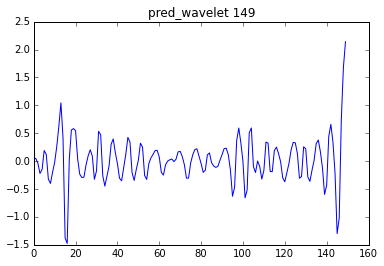

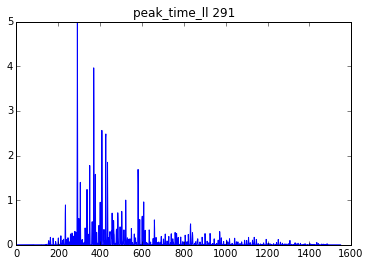

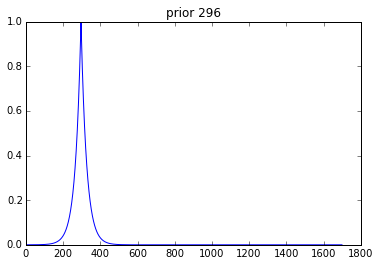

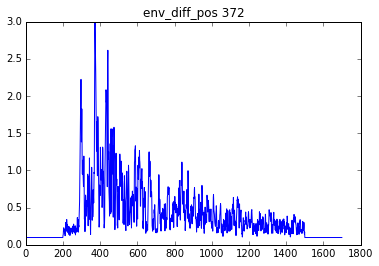

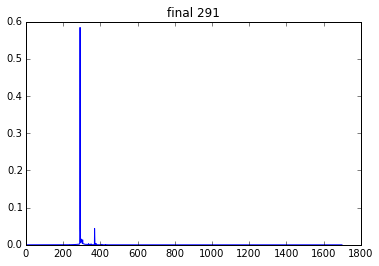

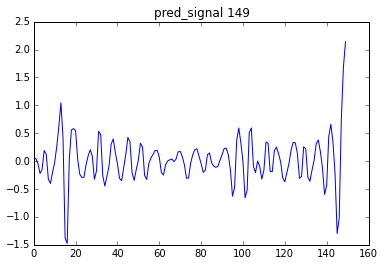

In [47]:
dd = sg.debug_dists["wave_MK31_BHZ_freq_0.8_4.5_1240246002.8"]
for k in dd.keys():
    figure()
    plot(dd[k])
    title("%s %d" % (k, np.argmax(dd[k])))

In [48]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-3068.71200838
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -17.2
ev observations: ev 0.0
tt_residual: ev -0.9
ev global cost (n + priors + tt): -26.0
coda_decay: ev -13.9 ua 0.0 total -13.9
peak_decay: ev -4.9 ua 0.0 total -4.9
peak_offset: ev -3.3 ua 0.0 total -3.3
coda_height: ev -2.1 ua 0.0 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -24.2 ua 0.0 total -24.2
priors+params: ev -50.2 ua -0.0 total -50.2
station noise (observed signals): -3018.5
overall: -3068.7
official: -3068.7
None


-3018.47802226
-10492.2171487


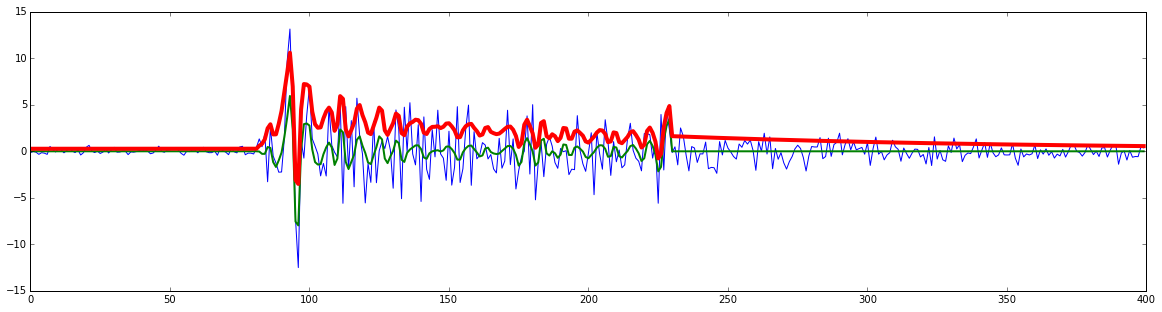

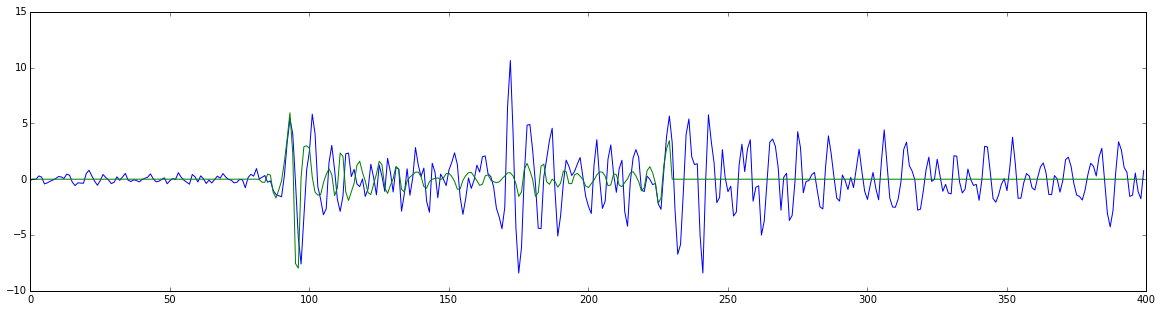

In [49]:
f = figure(figsize=(20, 5))
wn = sg.station_waves["MK31"][0]
z1 = wn.tssm.prior_sample(1700, 0)
plot(z1[200:600])
s1 = wn.tssm.obs_var(1700)
m1 = wn.tssm.mean_obs(1700)
plot(m1[200:600], lw=2)
plot(m1[200:600]+np.sqrt(s1)[200:600], lw=4)
print wn.log_p()
u1 = wn.unexplained_kalman()
figure(figsize=(20, 5))
plot(wn.get_value()[200:600])
#plot(u1[200:600])
plot(m1[200:600])
subtracted1 = wn.get_value() - m1
#plot(subtracted1[200:600])
print wn.nm.log_p(subtracted1)

In [50]:
from sigvisa.infer.event_birthdeath import ev_death_move_abstract

ev_death_move_abstract(sg, location_proposal=correlation_prop_MKAR,  
                       proposal_includes_mb=False, use_correlation=True)

reverse dist 5.88497287074 7.68840047672 old mb 8.5174774971 lp -2.11278516598
proposing to deassociate at MK31 (lp -0.0)
reverse deassociation MK31 1 P lp -0.000050
death helper -2.11278516598 -5.00131168055e-05 -25.3627083883
death move acceptance 54.0821736062 from -3068.71200838 -2987.15676078 -27.4755435674 -0.00246957125377


True

-2966.45282786
-10548.4150526


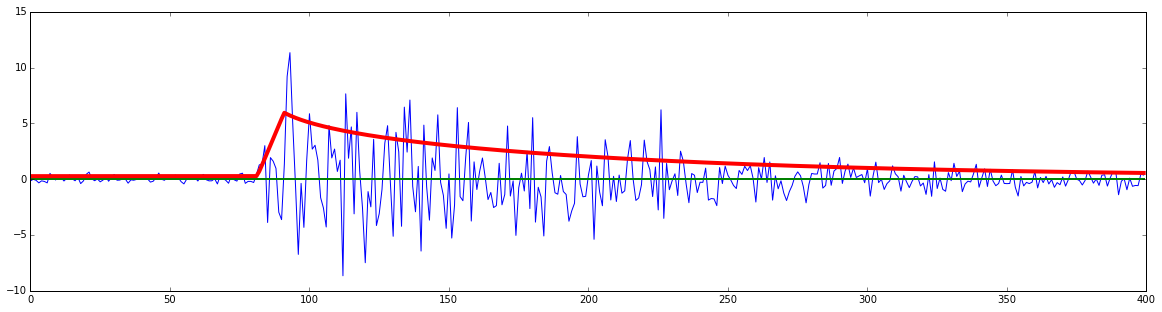

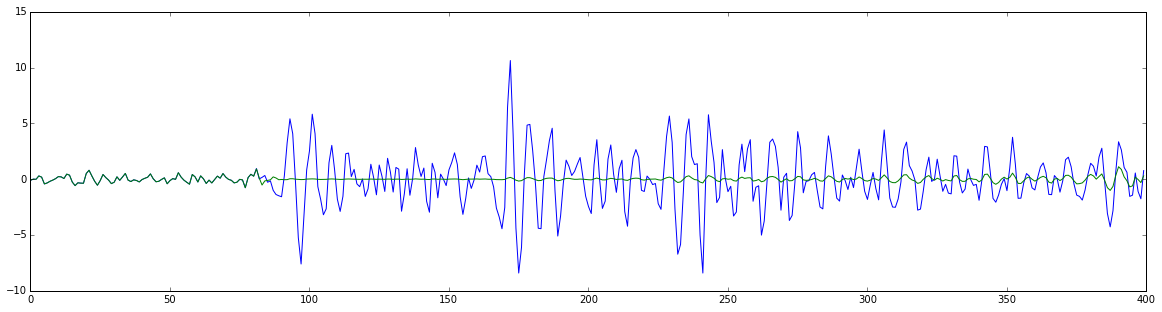

In [51]:
f = figure(figsize=(20, 5))
wn = sg.station_waves["MK31"][0]
z2 = wn.tssm.prior_sample(1700, 0)
plot(z2[200:600])
s2 = wn.tssm.obs_var(1700)
m2 = wn.tssm.mean_obs(1700)
plot(m2[200:600], lw=2)
plot(np.sqrt(s2)[200:600], lw=4)
print wn.log_p()
u2 = wn.unexplained_kalman()
figure(figsize=(20, 5))
plot(wn.get_value()[200:600])
plot(u2[200:600])
print wn.nm.log_p(wn.get_value() - m2)

In [40]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-2957.66620483
n_uatemplate: -13.8
n_event: -1.2
ev priors: ev 0.0
ev observations: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + tt): -1.2
coda_decay: ev 0.0 ua -1.3 total -1.3
peak_decay: ev 0.0 ua -1.1 total -1.1
peak_offset: ev 0.0 ua -1.1 total -1.1
coda_height: ev 0.0 ua -2.1 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -5.6 total -5.6
priors+params: ev -1.2 ua -19.4 total -20.7
station noise (observed signals): -2937.0
overall: -2957.7
official: -2957.7
None


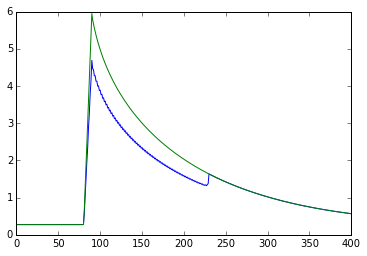

In [41]:
plot(np.sqrt(s1)[200:600])
plot(np.sqrt(s2)[200:600])


In [12]:
wn.wavelet_param_models.keys()

['P']

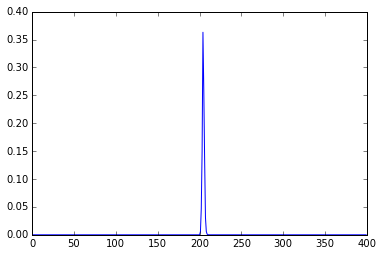

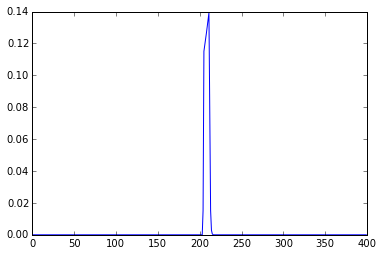

In [7]:
plot(proposal_otime_posteriors[5])

0.453191834581
262
0.695496941624
292


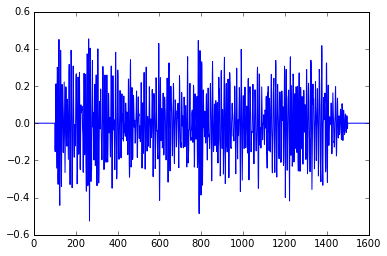

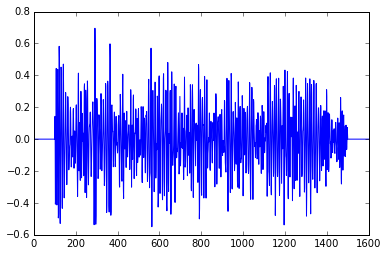

In [18]:
sta = "FITZ"
chan = "BHZ"
c1 = history[5][1][(sta, chan, "freq_0.8_4.5")]
c2 = history[best_weight_idx][1][(sta, chan, "freq_0.8_4.5")]

from sigvisa.signals.xc import my_xc
wn = sg.station_waves[sta][0]
sdata = wn.get_value()
sdata[np.isnan(sdata)] = 0

xc1 = my_xc(c1, sdata)
xc2 = my_xc(c2, sdata)

xc1[np.isnan(xc1)] = 0
xc2[np.isnan(xc2)] = 0

plot(xc1)
print np.max(xc1)
cm1 = np.argmax(xc1)
print cm1
figure()
plot(xc2)
print np.max(xc2)
cm2 = np.argmax(xc2)
print cm2

973.730961204
391
3281.58210004
364


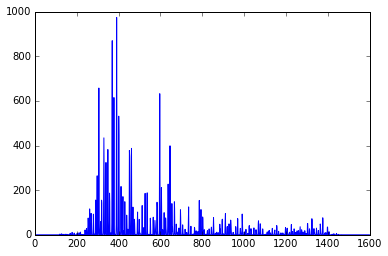

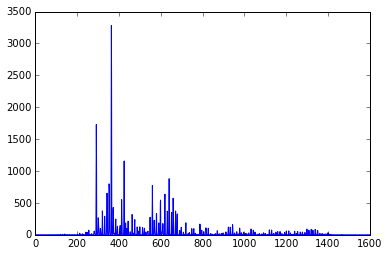

In [19]:
l1 = iid_advantage(sdata, c1)
l2 = iid_advantage(sdata, c2)
plot(l1)
print np.max(l1)
am1 = np.argmax(l1)
print np.argmax(l1)
figure()
plot(l2)
print np.max(l2)
am2 = np.argmax(l2)
print np.argmax(l2)


35.1990596828
391
118.743231284
364


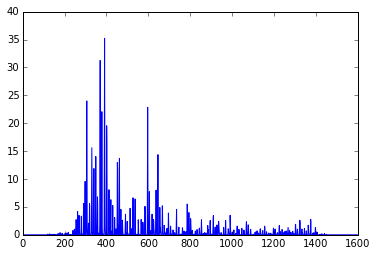

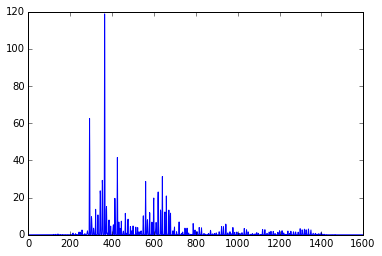

In [20]:
nm = estimate_ar(sdata, n_p=0)
l1 = ar_advantage(sdata, c1, nm)
l2 = ar_advantage(sdata, c2, nm)
plot(l1)
print np.max(l1)
am1 = np.argmax(l1)
print np.argmax(l1)
figure()
plot(l2)
print np.max(l2)
am2 = np.argmax(l2)
print np.argmax(l2)

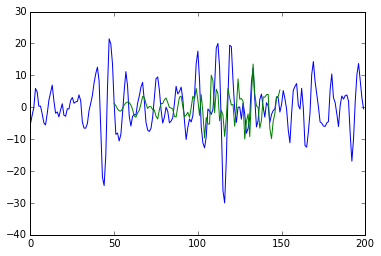

In [21]:
idx1 = am1-50
idx2 = am1 + 150

plot(sdata[idx1:idx2])
xs = np.arange(50, 150)
plot(xs, 41*c1)

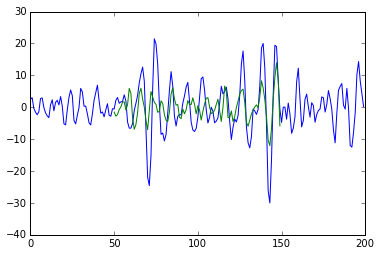

In [22]:
idx1 = am2-50
idx2 = am2 + 150

plot(sdata[idx1:idx2])
xs = np.arange(50, 150)
plot(xs, 41*c2)

In [26]:
wn.nm.log_p(sdata)

-265865.85954253015